In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm 
import pylab as py

In [37]:
np.random.seed(0)
a=np.random.normal(loc=0,scale=1,size=100)
norm=scipy.stats.norm

(array([ 1.,  5.,  7., 13., 17., 18., 16., 11.,  7.,  5.]),
 array([-2.55298982, -2.07071537, -1.58844093, -1.10616648, -0.62389204,
        -0.1416176 ,  0.34065685,  0.82293129,  1.30520574,  1.78748018,
         2.26975462]),
 <a list of 10 Patch objects>)

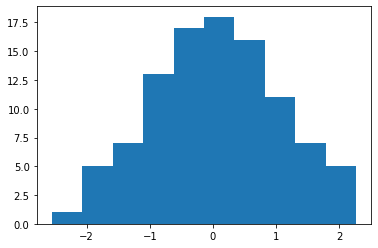

In [38]:
plt.hist(a)

In [39]:
a

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
       -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877,
        0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
        0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275,
       -1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
       -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028,
       -0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223,
        0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117,
       -0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614,
       -0.40178094, -1.63019835,  0.46278226, -0.90729836,  0.05

In [40]:
p_th = [i/100 for i in range(1,101)]

In [42]:
p_obs1 = sorted(norm.sf(np.array(a)))

$p_{obs1}$ correspond à l'ensemble des p-values à droite des éléments triées. Si les éléments suivent effectivement une loi normale centrée réduite, on s'attend à ce que $p_{obs1}(k)$ soit égal à k/n.

Si les valeurs statistiques de l'échantillon sont plus élevées que ce à quoi on s'attend pour la loi, alors les p-values sont plus basses.

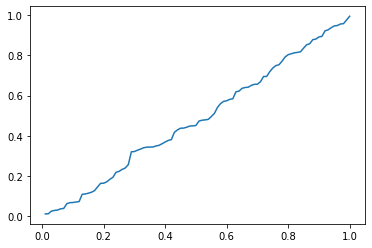

In [44]:
plt.plot(p_th,p_obs1)

In [53]:
k=0
p_obs2 = []
for i in range(100):
    while k < 100 and 1-p_obs1[100-1-k] < p_th[i]:
        k=k+1
    p_obs2=p_obs2+[k/100]

$p_{obs2}$ correspond à $Card(\{x|F(x)<k/n\})/n = Card(\{x|1-F(x)>1-k/n\})/n$, la proportion d'éléments dont la valeur correspondante de la fonction de répartition est inférieure à k/n. Comme pour $p_{obs1}$, si les éléments suivent la loi correspondant à la fonction de répartition (loi normale centrée réduite), on s'attend à ce que $p_{obs2}(k)$ soit égal à k/n.

Si les valeurs statistiques sont moins élevées, les valeurs de $F(x)$ le sont également, d'où la proportion de $F(x) < k/n$ est potentiellement plus importante pour une valeur de $k$ donnée, donc comme pour $p_{obs1}$, les valeurs de $p_{obs2}$ sont plus élevées.

In [55]:
p_obs1

[0.011611237557454506,
 0.012516496941700705,
 0.025541884992560656,
 0.02898735025557552,
 0.030911853326642494,
 0.03706011471188455,
 0.0388615832664841,
 0.06266513184831007,
 0.06757747648113734,
 0.06834219864868844,
 0.07086775206100573,
 0.07293524625184171,
 0.10929413642730346,
 0.11076968208671567,
 0.11460819646701365,
 0.11924298052062199,
 0.12726803529063996,
 0.14583807528714066,
 0.16385472943819823,
 0.1643739430660578,
 0.1710336639787779,
 0.18384029115472605,
 0.19367415730909815,
 0.2184347610967805,
 0.2233172673520214,
 0.2329731336730167,
 0.23991588408991488,
 0.25667878041636316,
 0.32072857080095596,
 0.32176022574404994,
 0.32857073416207194,
 0.3342047593405401,
 0.3406834811807825,
 0.3437163063920613,
 0.34384592713116935,
 0.3445203650627423,
 0.3494141959377871,
 0.3526549333217056,
 0.3607830954273564,
 0.36931266206568286,
 0.37711461344011576,
 0.3811461765630454,
 0.417507133922981,
 0.4295868372556586,
 0.43787897957326355,
 0.43843138240526314,
 

In [56]:
p_obs2

[0.01,
 0.01,
 0.02,
 0.02,
 0.04,
 0.06,
 0.07,
 0.09,
 0.09,
 0.09,
 0.11,
 0.12,
 0.13,
 0.13,
 0.15,
 0.15,
 0.16,
 0.16,
 0.19,
 0.21,
 0.22,
 0.22,
 0.23,
 0.23,
 0.24,
 0.25,
 0.26,
 0.26,
 0.27,
 0.27,
 0.29,
 0.29,
 0.29,
 0.3,
 0.33,
 0.35,
 0.36,
 0.37,
 0.38,
 0.38,
 0.38,
 0.4,
 0.42,
 0.43,
 0.43,
 0.44,
 0.44,
 0.44,
 0.45,
 0.45,
 0.46,
 0.47,
 0.5,
 0.5,
 0.51,
 0.54,
 0.56,
 0.57,
 0.58,
 0.58,
 0.58,
 0.59,
 0.6,
 0.62,
 0.63,
 0.68,
 0.69,
 0.72,
 0.72,
 0.72,
 0.72,
 0.72,
 0.72,
 0.72,
 0.73,
 0.73,
 0.75,
 0.76,
 0.77,
 0.77,
 0.78,
 0.79,
 0.8,
 0.82,
 0.82,
 0.83,
 0.83,
 0.84,
 0.87,
 0.88,
 0.88,
 0.88,
 0.9,
 0.93,
 0.93,
 0.93,
 0.96,
 0.98,
 1.0,
 1.0]

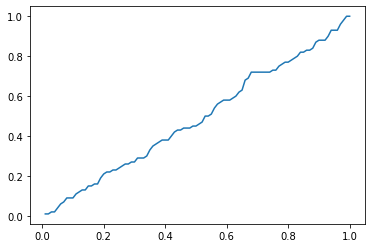

In [57]:
plt.plot(p_th,p_obs2)